# Introduction to Agent Based Modeling

Along with the SD models, starting from version 0.4.0, you can simulate agent based models. Agent based models use agents or actors, that follow a certain logic, communicate with each other and are triggered at every timestep t.

They are a little more complex as they require you to program some logic.
[abm/spm/](abm/spm/) contains example code. It is an agent-based implementation of the simple Project Management. We also need to program the agent logic. ``BPTK-Py`` comes with main classes ``ABModel, Agent and Scheduler`` which the concrete implementations need to inherit. 
The scenarios are also stored in JSON files, similar to the already-known JSON files for SD models. See [scenarios/abm.json](scenarios/abm.json). The most important change is that you need to tell ``BPTK-Py`` which class to load as model.

To plot the scenario, you need to inform ``BPTK-Py`` which agents to plot for and which states. In this example, a task has the states open, in progress and closed. Note that the dashboard method cannot modify constants of agent based models as of now:

In [3]:
## BPTK Package
from BPTK_Py.bptk import bptk 

bptk = bptk()

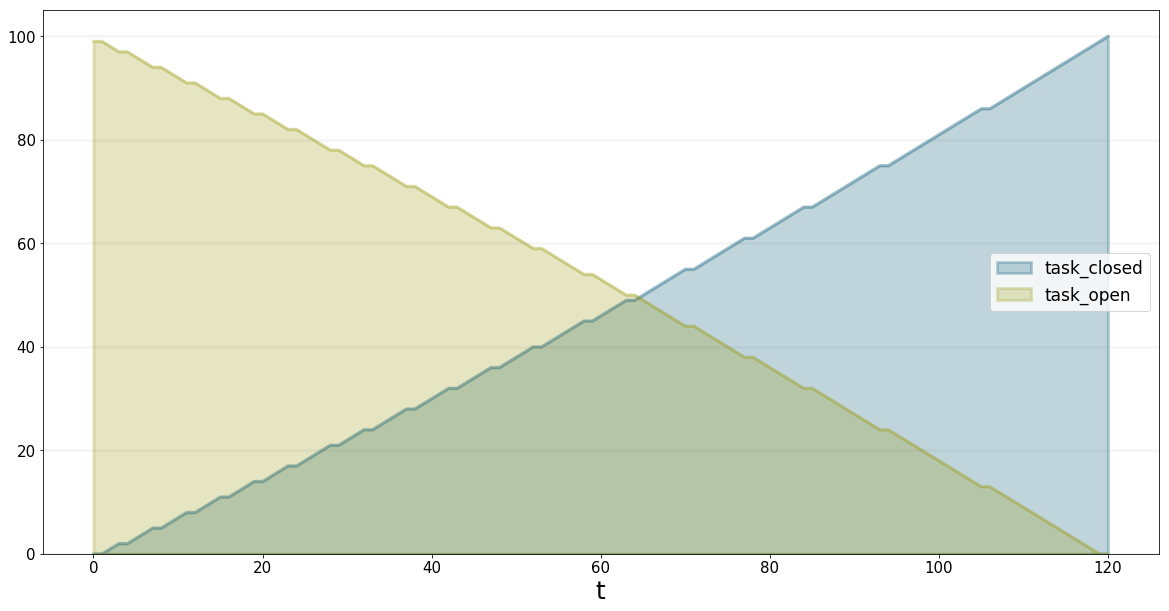

In [4]:
bptk.plot_scenarios(
    scenario_managers=[
                       "ABMsmSimpleProjectManagement",
                      ],
    kind="area",
    scenarios=["scenarioSPM"],
    equations=["openTasks","closedTasks"],
    agents=["task"],
    agent_states=["open","closed"],
)


### Widgets for ABM simulation
Agent based simulations can take a very long time. Visualizations with widgets can visualize the progress of the simulation by monitoring agent states.

As of now, the framework comes with a widget to show states of the agents. In order to use progress widgets, you need to implement the method ``build_widget()`` in your Agent based model implementation. 
The following is an example that tracks the states of all task agents. You need to map which states to monitor and create a widgetLoader. The widgetLoader loads the specified class and you need to hand over all arguments for the widget:

```python
def build_widget(self):
    widgetLoader = WidgetLoader()
    states = {1: Task.STATES["IN_PROGRESS"], 2: Task.STATES["CLOSED"]}
    agents = [agent for agent in self.agents if isinstance(agent, Task)]
        
    widgetLoader.create_widget("AgentStatusWidget", states=states, agents=agents)
        
    return widgetLoader
```

In [6]:
df =bptk.run_abm_with_widget(scenario_manager="ABMsmSimpleProjectManagement",scenario="scenarioSPM",agents=["task"],
    agent_states=["open","closed"],)